<a href="https://colab.research.google.com/github/pmehta-2011/clustering/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
# Load the Wine dataset
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)


In [5]:

# Function to apply log transformation
def apply_transformation(X, method='log'):
    if method == 'log':
        return np.log1p(X)  # log(1 + X) to avoid negative values
    elif method == 'sqrt':
        return np.sqrt(X)  # square root transformation
    else:
        return X

In [6]:
# Apply PCA (for dimensionality reduction)
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

In [7]:
# Plot clusters for PCA-reduced data
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [8]:
# Perform Hierarchical Clustering and display metrics
def hierarchical_clustering(X, n_clusters=3, title="Hierarchical Clustering"):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = model.fit_predict(X)

    # Plot clusters
    plot_clusters(X, clusters, title)

    # Evaluation metrics
    silhouette_avg = silhouette_score(X, clusters)
    calinski_harabasz = calinski_harabasz_score(X, clusters)
    davies_bouldin = davies_bouldin_score(X, clusters)

    # Print metrics summary
    print(f"\n{title} (n_clusters={n_clusters})")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}\n")

    return silhouette_avg, calinski_harabasz, davies_bouldin

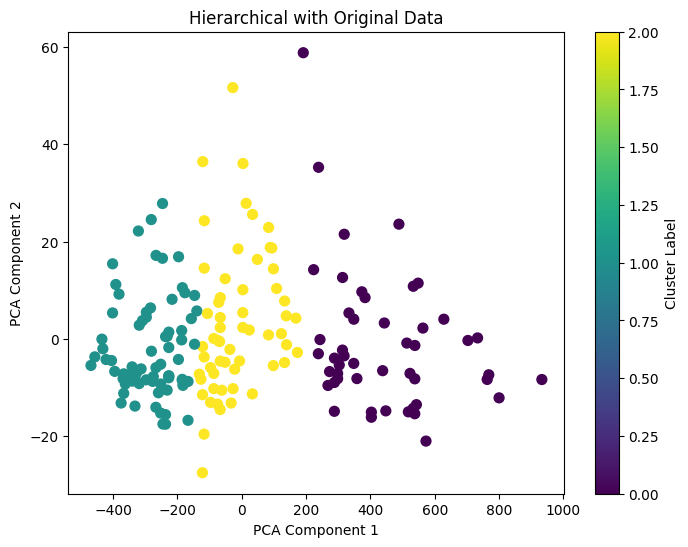


Hierarchical with Original Data (n_clusters=3)
Silhouette Score: 0.5656
Calinski-Harabasz Score: 553.5317
Davies-Bouldin Score: 0.5343



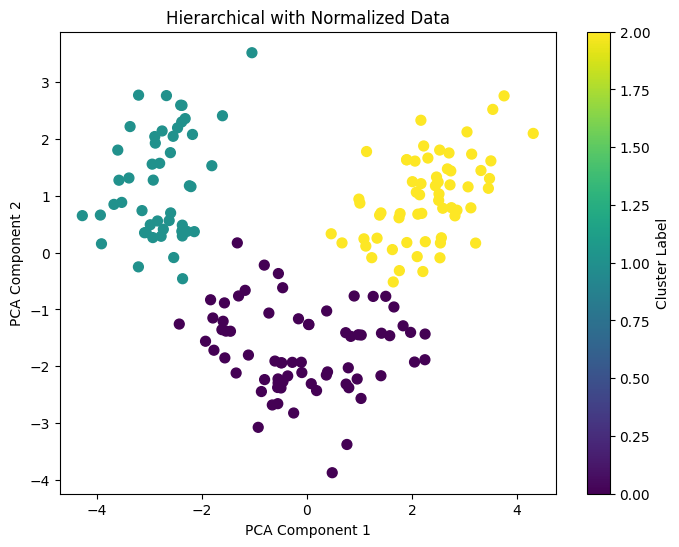


Hierarchical with Normalized Data (n_clusters=3)
Silhouette Score: 0.5591
Calinski-Harabasz Score: 341.0582
Davies-Bouldin Score: 0.6013



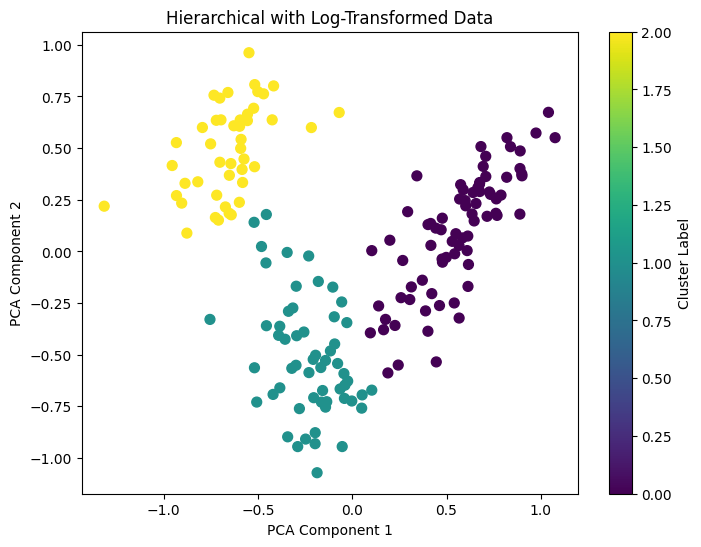


Hierarchical with Log-Transformed Data (n_clusters=3)
Silhouette Score: 0.5613
Calinski-Harabasz Score: 310.5075
Davies-Bouldin Score: 0.5747



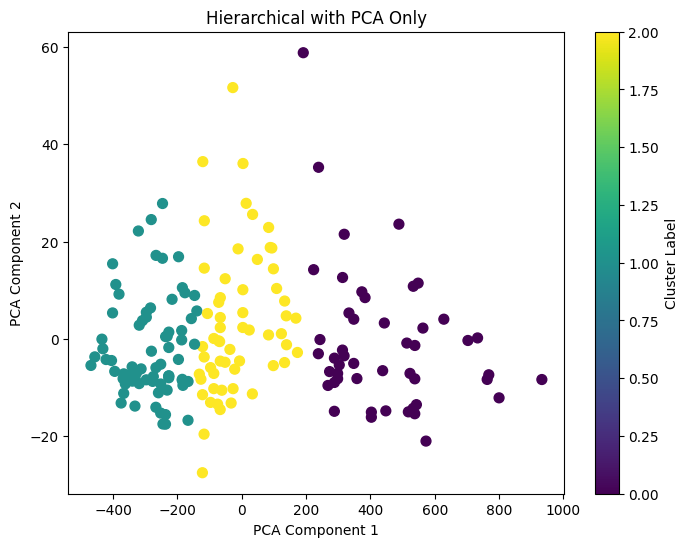


Hierarchical with PCA Only (n_clusters=3)
Silhouette Score: 0.5656
Calinski-Harabasz Score: 553.5317
Davies-Bouldin Score: 0.5343



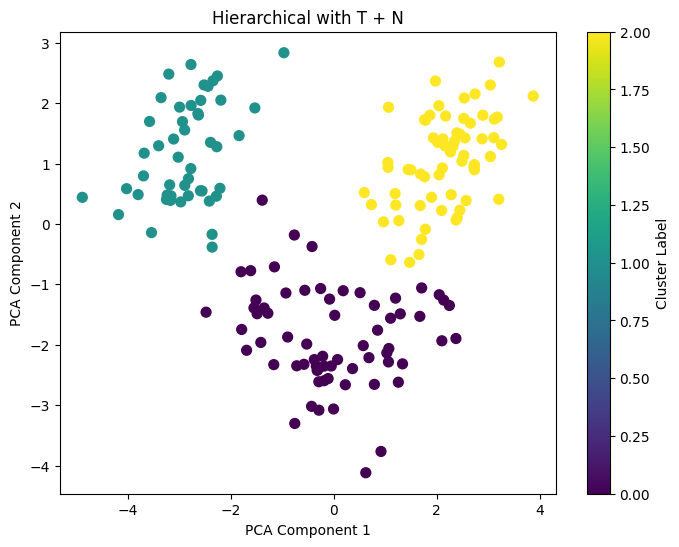


Hierarchical with T + N (n_clusters=3)
Silhouette Score: 0.5826
Calinski-Harabasz Score: 367.9235
Davies-Bouldin Score: 0.5784



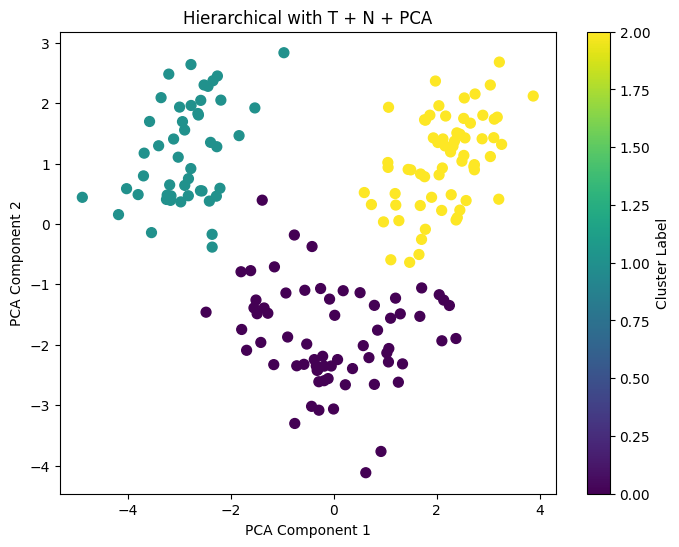


Hierarchical with T + N + PCA (n_clusters=3)
Silhouette Score: 0.5826
Calinski-Harabasz Score: 367.9235
Davies-Bouldin Score: 0.5784



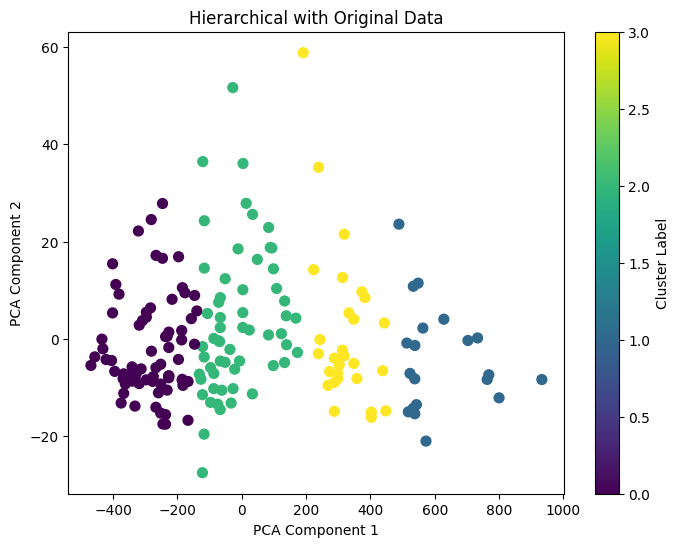


Hierarchical with Original Data (n_clusters=4)
Silhouette Score: 0.5619
Calinski-Harabasz Score: 672.0228
Davies-Bouldin Score: 0.5523



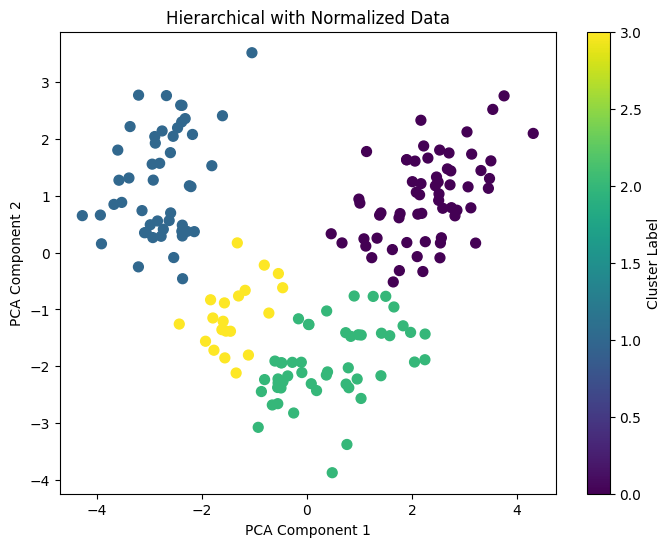


Hierarchical with Normalized Data (n_clusters=4)
Silhouette Score: 0.4813
Calinski-Harabasz Score: 307.2411
Davies-Bouldin Score: 0.7187



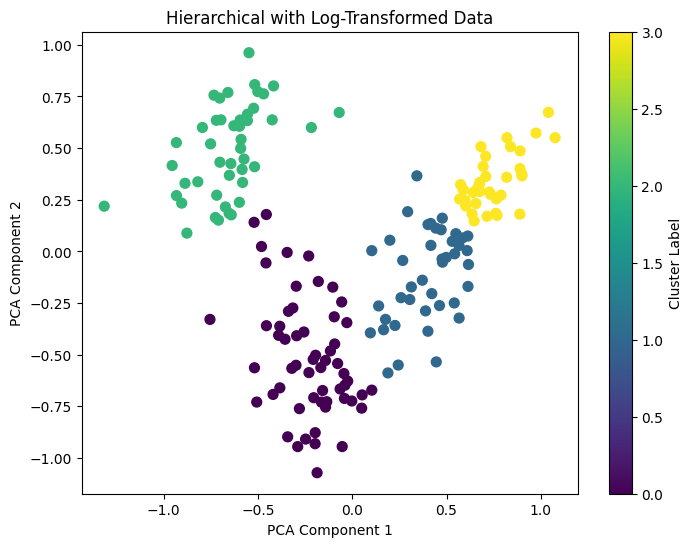


Hierarchical with Log-Transformed Data (n_clusters=4)
Silhouette Score: 0.5018
Calinski-Harabasz Score: 321.4234
Davies-Bouldin Score: 0.6637



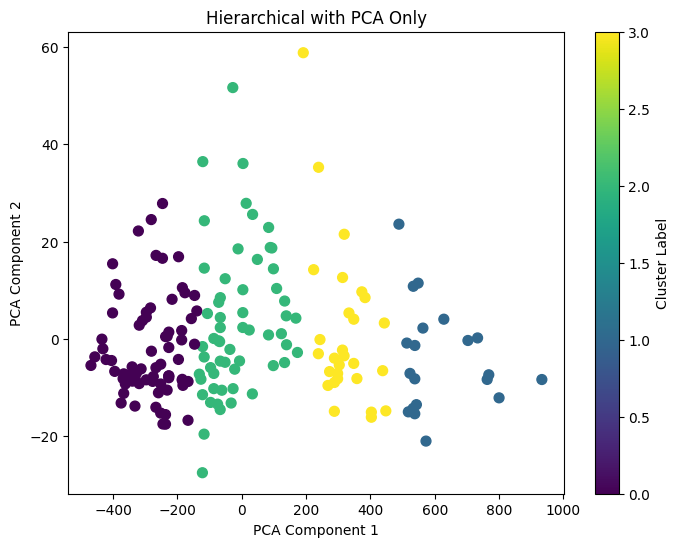


Hierarchical with PCA Only (n_clusters=4)
Silhouette Score: 0.5619
Calinski-Harabasz Score: 672.0228
Davies-Bouldin Score: 0.5523



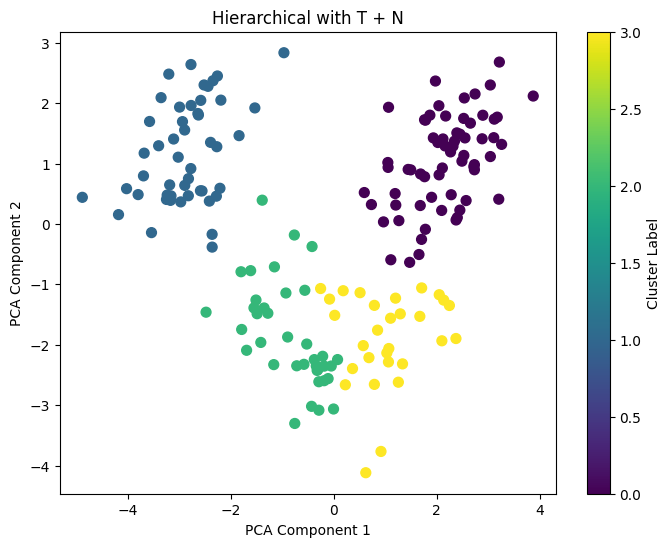


Hierarchical with T + N (n_clusters=4)
Silhouette Score: 0.5045
Calinski-Harabasz Score: 331.0932
Davies-Bouldin Score: 0.7791



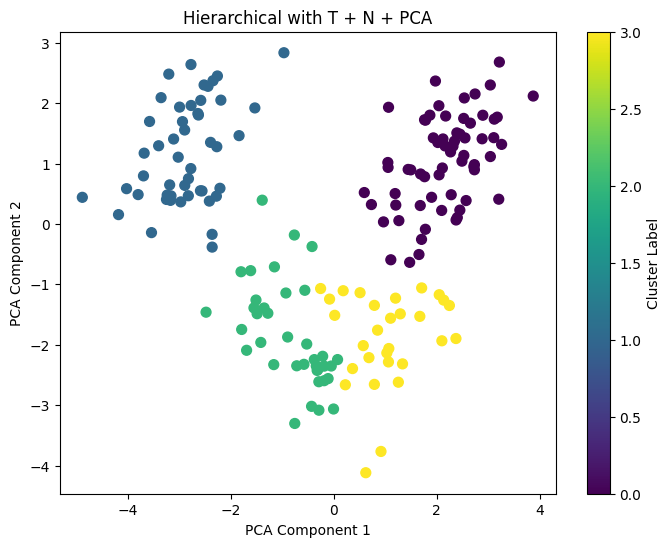


Hierarchical with T + N + PCA (n_clusters=4)
Silhouette Score: 0.5045
Calinski-Harabasz Score: 331.0932
Davies-Bouldin Score: 0.7791



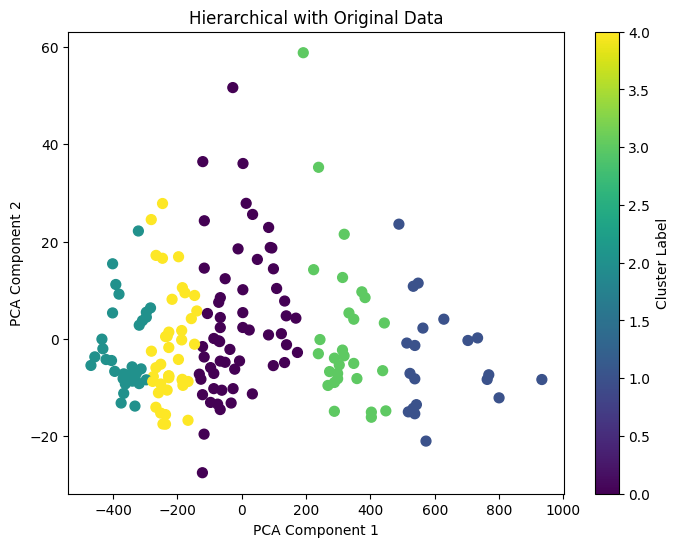


Hierarchical with Original Data (n_clusters=5)
Silhouette Score: 0.5009
Calinski-Harabasz Score: 685.2853
Davies-Bouldin Score: 0.5563



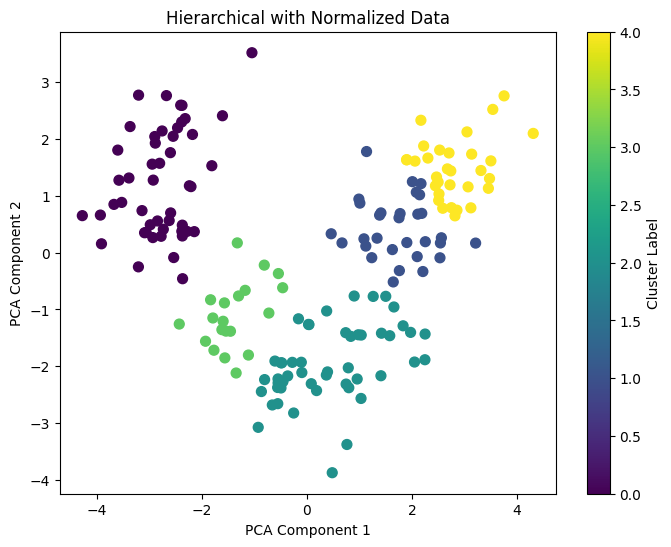


Hierarchical with Normalized Data (n_clusters=5)
Silhouette Score: 0.3898
Calinski-Harabasz Score: 283.5634
Davies-Bouldin Score: 0.8399



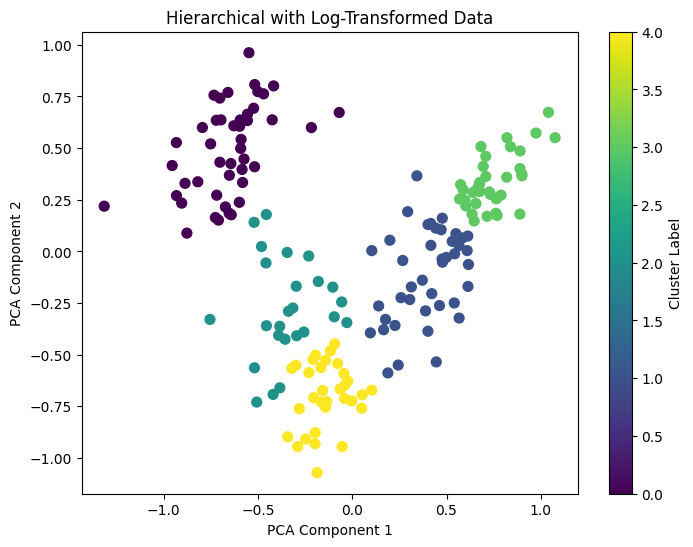


Hierarchical with Log-Transformed Data (n_clusters=5)
Silhouette Score: 0.4511
Calinski-Harabasz Score: 315.9966
Davies-Bouldin Score: 0.7747



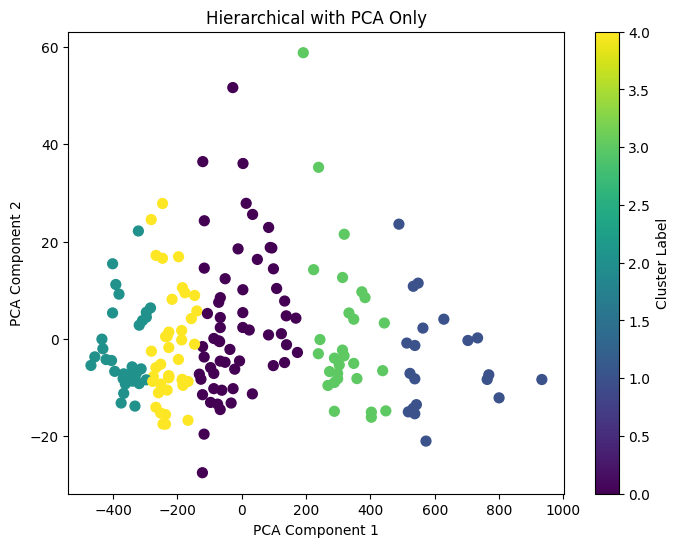


Hierarchical with PCA Only (n_clusters=5)
Silhouette Score: 0.5009
Calinski-Harabasz Score: 685.2853
Davies-Bouldin Score: 0.5563



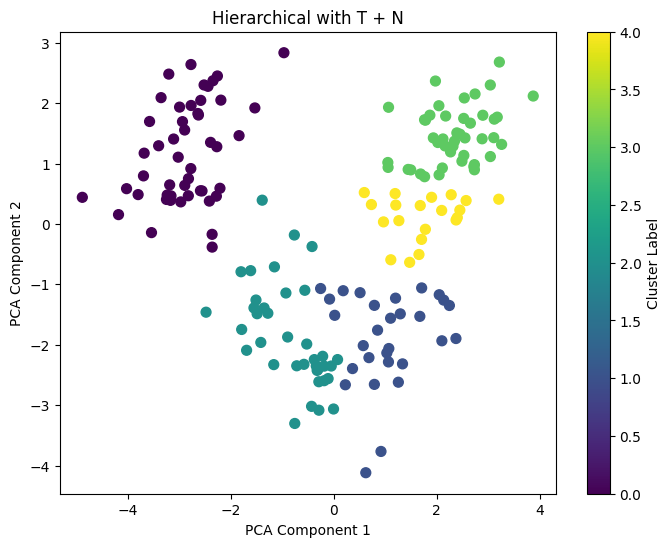


Hierarchical with T + N (n_clusters=5)
Silhouette Score: 0.4268
Calinski-Harabasz Score: 299.9067
Davies-Bouldin Score: 0.8743



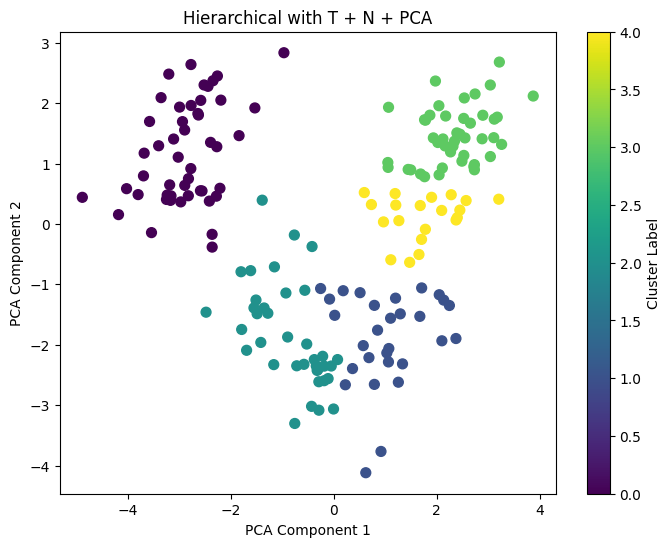


Hierarchical with T + N + PCA (n_clusters=5)
Silhouette Score: 0.4268
Calinski-Harabasz Score: 299.9067
Davies-Bouldin Score: 0.8743


Summary of Clustering Results:
                  Method  n_clusters  Silhouette Score  \
0          Original Data           3          0.565581   
1        Normalized Data           3          0.559088   
2   Log-Transformed Data           3          0.561294   
3               PCA Only           3          0.565581   
4                  T + N           3          0.582563   
5            T + N + PCA           3          0.582563   
6          Original Data           4          0.561920   
7        Normalized Data           4          0.481286   
8   Log-Transformed Data           4          0.501754   
9               PCA Only           4          0.561920   
10                 T + N           4          0.504531   
11           T + N + PCA           4          0.504531   
12         Original Data           5          0.500913   
13       Normalized D

In [9]:
# Run Hierarchical clustering for multiple preprocessing methods
def run_hierarchical_clustering(X, cluster_values=[3, 4, 5]):
    results = {
        "Method": [], "n_clusters": [], "Silhouette Score": [],
        "Calinski-Harabasz Score": [], "Davies-Bouldin Score": []
    }

    methods = ["Original Data", "Normalized Data", "Log-Transformed Data", "PCA Only", "T + N", "T + N + PCA"]

    for n_clusters in cluster_values:
        for method in methods:
            if method == "Original Data":
                X_pca = apply_pca(X, n_components=2)
            elif method == "Normalized Data":
                scaler = StandardScaler()
                X_normalized = scaler.fit_transform(X)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "Log-Transformed Data":
                X_transformed = apply_transformation(X, method='log')
                X_pca = apply_pca(X_transformed, n_components=2)
            elif method == "PCA Only":
                X_pca = apply_pca(X, n_components=2)
            elif method == "T + N":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)
            elif method == "T + N + PCA":
                X_transformed = apply_transformation(X, method='log')
                X_normalized = StandardScaler().fit_transform(X_transformed)
                X_pca = apply_pca(X_normalized, n_components=2)

            # Run Hierarchical clustering and plot results
            silhouette_avg, calinski_harabasz, davies_bouldin = hierarchical_clustering(X_pca, n_clusters=n_clusters, title=f"Hierarchical with {method}")

            # Store results in the table
            results["Method"].append(method)
            results["n_clusters"].append(n_clusters)
            results["Silhouette Score"].append(silhouette_avg)
            results["Calinski-Harabasz Score"].append(calinski_harabasz)
            results["Davies-Bouldin Score"].append(davies_bouldin)

    # Create a DataFrame from the results
    df_results = pd.DataFrame(results)

    # Print the final summary table
    print("\nSummary of Clustering Results:")
    print(df_results)
    return df_results

# Run Hierarchical clustering and generate plots
hierarchical_results = run_hierarchical_clustering(X, cluster_values=[3, 4, 5])
